# Data Vizualization for Others    
*Renaissance EXL*  
*Renaissance Learning, 2022*  
  
You've explored the data, found some patterns, and run some analytics. Now it's time to share your data with others.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame
from random import shuffle

## Today's Session
1. Housekeeping
2. Share out your data visualization
3. Data visualization for others
    1. General principles
    2. Ensuring clarity with axes, ranges, and labels
    3. Choosing the right visualization for your story
    4. Colorblind friendly color schemes
    5. Communication across cultures
    6. How to confuse (mislead?) others
4. Wrap up

## Housekeeping

The presentation date has been deferred from week 8. I'm trying to line up a new date where I can bring in some key people at the company, but the new date hasn't been confirmed. I'll be in touch and we'll find a time that works for all of you, even with school.

Justin will lead a Writers Workshop on Friday.

## Sharing Out

Take 2–3 minutes each to talk about a graph or graphs you have made. Walk us through...

- What is the most important take-away from the graph(s)

- Any secondary take-aways you want people to notice?

- Why did you choose to visualize this data in this way...
    - Why *this* type of graph (bar plot, scatterplot, histogram, etc.)
    - Why *these* colors?
    - Why *these* shapes?

- Is there anything you think could be confusing?

- Something you're proud of in this visual?

- Anything else

In [3]:
presenters = ['Aiden', 'Allison', 'Hassan', 'Srikar', 'Trevor']
shuffle(presenters)
for i, p in enumerate(presenters):
    print(f'{i+1}. {p}')

1. Srikar
2. Hassan
3. Trevor
4. Aiden
5. Allison


## Data Visualization for Others

As a data researcher, we generally use data visualization for one of three purposes:

1. **Research:** To help ourselves better understand the data, by "asking questions" of datasets

2. **Storytelling**: To highlight and communicate important details about the data for other stakeholders

3. **Dashboard**: To provide stakeholders with a way to *easily retrieve their own answers* to a pre-defined set of questions about datasets that change over time

### General Principles

**Type in chat:** What are 2 things you'd change to improve / declutter this visualization?

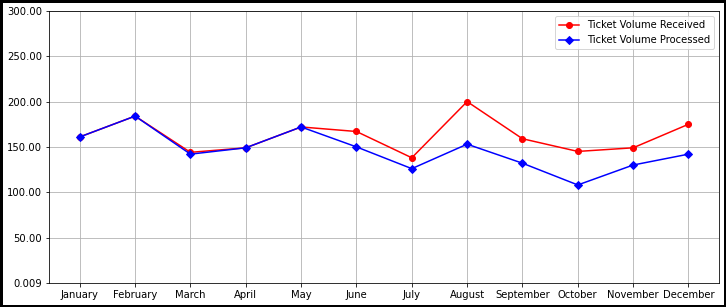

In [4]:
from utils import make_simple_graph
p = make_simple_graph()

#### Core principles

- Data - Ink Ration Maximixation

- One property to facet

Facets
- location (x, y, z)
- size
- color
- shape

### Ensuring clarity with axes, ranges, and labels

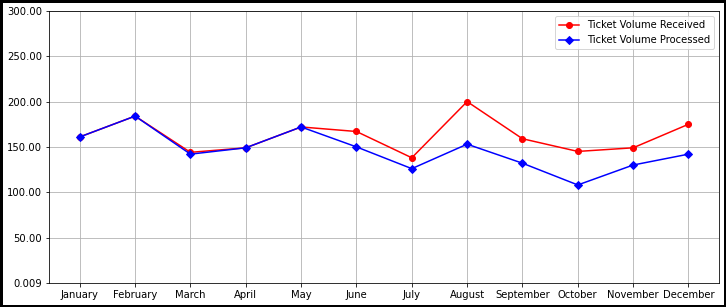

In [5]:
# code to reproduce graph above:
tickets = pd.read_csv('../data/tickets_processed.csv')

x = tickets['month']
y1 = tickets['ticket_volume_received']
y2 = tickets['ticket_volume_processed']

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()

ax.plot(x, y2, marker='o', label='Ticket Volume Received', color='red')
ax.plot(x, y1, marker='D', label='Ticket Volume Processed', color='blue')

ax.legend(loc=1)
ax.yaxis.set_major_formatter('{x:9<5.2f}')
ax.set_ylim(0,300)
ax.grid()
fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('black')

plt.show();

#### Accessing elements on a graph in `matplotlib`
- Figure Size
- Colors
- Shape of Markers
- Title
- Grid Lines
- Legends
- Spines
- Axis Range
- Axis Ticks
- Axis Labels

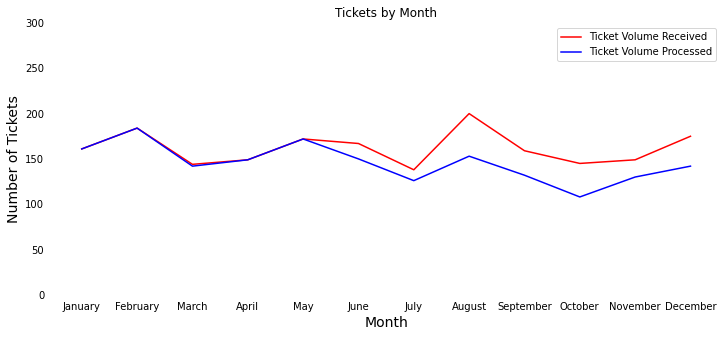

In [37]:
# Figure Size, Colors, Shape of Markers, Title, Grid Lines, 
# Legends, Spines, Axis Range, Axis Ticks, Axis Labels

#fig = plt.figure()
#ax = fig.add_subplot()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()

#ax.plot(x, y2)
#ax.plot(x, y1)

ax.plot(x, y2, label='Ticket Volume Received' , color='red')
ax.plot(x, y1, label='Ticket Volume Processed', color='blue')

ax.set_title('Tickets by Month')
#ax.grid()
#ax.grid(axis='both') # default
#ax.grid(axis='y')
ax.legend(loc=1)

#ax.yaxis.set_major_formatter('{x:9<5.2f}') # precision of axis labels
ax.set_ylim(0, 300)

#ax.spines['top'].set_visible(False)
#ax.spines[['top', 'right']].set_visible(False)
ax.spines[:].set_visible(False)
#ax.spines['top'].set_color('green')

#ax.tick_params(bottom=False, left=True, right=True, top=True)
ax.tick_params(bottom=False, left=False)

ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Tickets', fontsize=14)

#fig.patch.set_linewidth(5)
#fig.patch.set_edgecolor('black')

plt.show()

Let's clean up our original graph

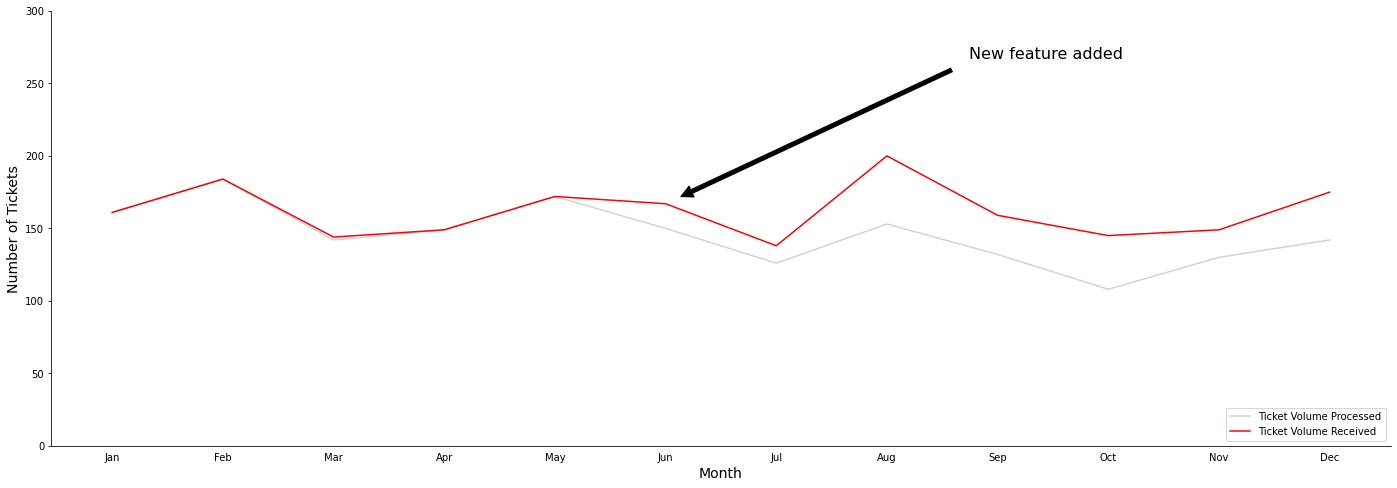

In [38]:
x2 = [m[:3] for m in x] # shorten month names to first 3 letters
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot()

ax.plot(x2, y1, label='Ticket Volume Processed', color='lightgrey')
ax.plot(x2, y2, label='Ticket Volume Received', color='red')

ax.annotate('New feature added', (5, y2[5]), xytext=(0.8, 0.9), 
    textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=16, horizontalalignment='right', verticalalignment='center'
)

ax.legend(loc=4)
ax.set_ylim(0, 300)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Tickets', fontsize=14)

ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(bottom=False)

plt.show()

### Choosing the right visualization for your story

Some graphs are better suited than others for certain data

- **Barplot:** Comparing categorical data

- **Scatterplot:** Showing shape and patterns in all data points

- **Connected lines:** Showing the trend over time

- **Pie chart:** Almost nothing

### Effective communication

- Make sure no more than one or two insights jump off the graph

- Use color, size, and labels to call attention to important elements

- If there's nothing obvious, you can add a text box to tell people what they should see

### Colors
Put your favorite color in the chat...
<img src="../images/color-wheel.webp" alt="A color wheel" width="800"/>



#### Colorblind-friendly color schemes

About 8–9% of people in the US have a form of colorblindness.

~1 in 12 people

We should make sure these people can see our graphs too!

How does color vision work?
![cones](../images/cones)

![frequency sensitivity](../images/frequency-sensitivity)

![colorblind color wheels](../images/colorblindness-wheels)

![Apples with colorblind filter](../images/colorblind-apples)

Avoid colormaps between red and green!

Default color gradient in matplotlib, `viridis`: a safe choice!

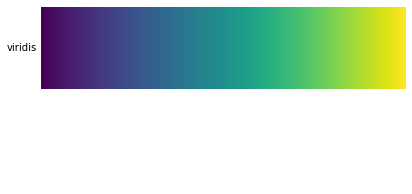

In [39]:
# from https://matplotlib.org/stable/tutorials/colors/colormaps.html
import matplotlib as mpl

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    #figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    figh = 3
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

plot_color_gradients('Perceptually Uniform Sequential', ['viridis'])


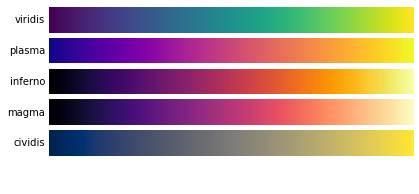

In [40]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

### Communication across cultures

Is anything confusing about this graph?

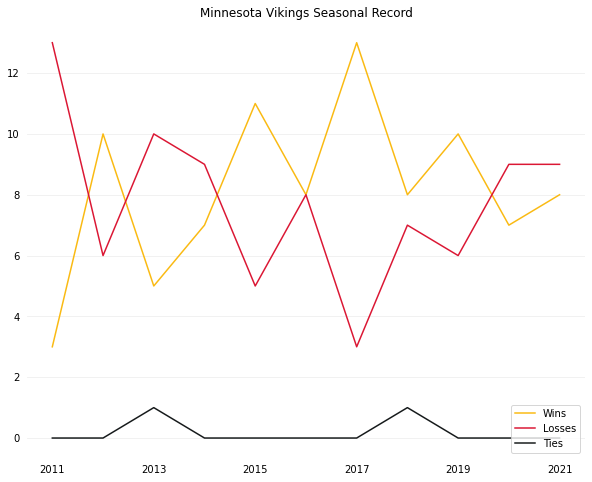

In [41]:
vikings = pd.read_csv('../data/vikings.csv')
year = vikings['year']
wins = vikings['wins']
losses = vikings['losses']
ties = vikings['ties']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
ax.plot(year, wins,   color='#FABA13', label='Wins')
ax.plot(year, losses, color='#DB1734', label='Losses')
ax.plot(year, ties,   color='#161A1B', label='Ties')
plt.title('Minnesota Vikings Seasonal Record')
plt.xticks(np.arange(2011, 2022, 2))
ax.yaxis.grid(True, which='major', color='#EEE')
plt.legend(loc=4)
ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False)
plt.show()

Is anything confusing about this graph?

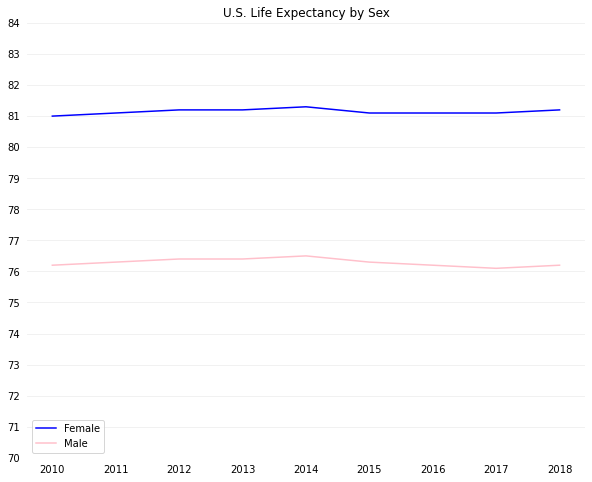

In [42]:
le = pd.read_csv('../data/life_expectancy.csv')
year = le['year']
female = le['female']
male = le['male']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
ax.plot(year, female, color='blue', label='Female')
ax.plot(year, male, color='pink', label='Male')
ax.set_title('U.S. Life Expectancy by Sex')
ax.yaxis.grid(True, which='major', color='#EEE')
ax.legend(loc=3)
plt.yticks(np.arange(70, 85))
ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False)
plt.show()

I am ***NOT*** saying we should use stereotypes. Please do not do this.

I ***AM*** saying be aware of the meaning of colors, shapes, etc. within a culture. 

If you seek to contradict a cultural norm, do it with intent.

#### More on colors
What does <b><span style="color:red">red</span></b> represent in...

- the United States?

- Mexico?

- China?

### Other cultural norms to be aware of

**Direction**

- Among European/American cultures, time is generally plotted **left-to-right** on the x- (horizontal) axis.

- Arabic and Hebrew *may occasionally* plot time **right-to-left** on the x-axis.

- (This may be true in other RTL languages like Urdu, Kurdish, Rohingya, Divehi, etc., but I could not confirm)

If you're not sure, ask someone who knows!  

People generally like sharing their culture with people who are genuinely curious and non-judgemental

### How to confuse (mislead?) others

From [5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/), Ryan McReady, 2020

1. Omit the baseline
2. Manipulate the Y-Axis
3. Cherry Picking Data
4. Using the Wrong Graph
5. Going Against Conventions

![trump-gavel](../images/trump-gavel.png)
What do you see in the graph above?

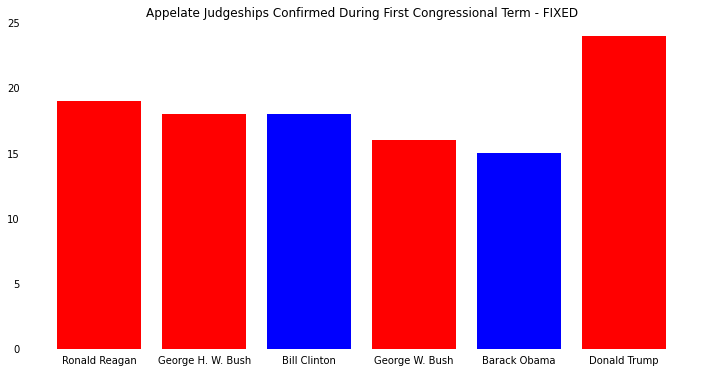

In [43]:
pres_data = pd.read_csv('../data/presidential_appointments.csv')
pres = pres_data['president']
party = pres_data['party']
appts = pres_data['appointments']
cmap = {'Republican': 'red', 'Democrat': 'blue'}

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.bar(pres, appts, color=[cmap[p] for p in party])

ax.set_title('Appelate Judgeships Confirmed During First Congressional Term - FIXED')
ax.spines[:].set_visible(False)
ax.tick_params(bottom=False,  left=False)
ax.set_ylim(0, 25)

plt.show()

![bush tax cuts from Fox Business](../images/bush-tax-cuts.png)
What do you see in the graph above?

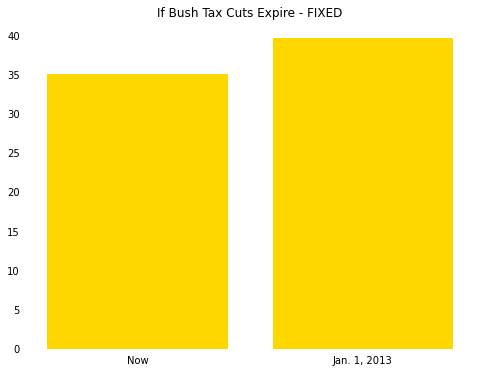

In [44]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.bar(['Now', 'Jan. 1, 2013'], [35, 39.6], color='gold')
ax.set_title('If Bush Tax Cuts Expire - FIXED')
ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False)
plt.show()

## Wrapping Up

### Final recommendations

matplotlib can be very simple, but it gets complicated fast!

Start simple

- Alter colors, axis labels, or add a legend

- Find examples online, and apply these to your graph

- Don't try to do too much at once

- Ask someone else who doesn't know your data to describe what they see
    - By now, you know the data too well to see it with fresh eyes

Think back to the graph you shared earlier.

Say one more thing you learned today that you can use to make your graph more clear

### Todo
1. Post your updated data visualization code to `#python` channel Slack
2. Prepare for Writers Workshop on Friday
3. Send me your school start date and times

## Resources
- [Data-Ink Principle (Edward Tufte)](https://jtr13.github.io/cc19/tuftes-principles-of-data-ink.html)
- [A Layered Graphics of Grammar (Hadley Wickham)](http://vita.had.co.nz/papers/layered-grammar.pdf)
- [5 Ways Writers Use Misleading Graphs to Manipulate You](https://venngage.com/blog/misleading-graphs/)
  
  
- [matplotlib Home](https://matplotlib.org/stable/index.html)  
- [matplotlib Examples](https://matplotlib.org/stable/gallery/index.html)
- [matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)
- [Colormaps in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Markers in matplotlib](https://matplotlib.org/stable/api/markers_api.html) 